In [1]:
from sympy import *
from sympy.utilities.autowrap import ufuncify
import scipy
import numpy
import itertools
import matplotlib
import matplotlib.pyplot as plt

In [2]:
init_session()

IPython console for SymPy 1.12 (Python 3.11.4-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



In [3]:
%matplotlib inline

In [4]:
def rational_func(x, n, m):
    p_symbols = [symbols(f"p{i}") for i in range(n + 1)]
    q_symbols = [symbols(f"q{i}") for i in range(1, n + 1)]
    fun = sum(x**i * p_i for (i, p_i) in enumerate(p_symbols)) / (1 + sum(x**(i + 1) * q_i for (i, q_i) in enumerate(q_symbols)))
    return fun, p_symbols, q_symbols

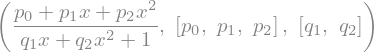

In [5]:
rational_func(x, 2, 2)

In [6]:
data = {
    "White box": [
        (3298.985, 100),
        (3992.491, 110),
        (4018.505, 130),
        (3091.246, 150),
        (2043.096, 200),
        (1509.625, 250),
        (1212.740, 300),
        (983.872, 350),
        (838.098, 400),
        (620.787, 500),
        (511.853, 600),
        (449.602, 700),
        (400.158, 800),
        (396.278, 900),
        (254, 1200),
    ],
    
    "Red envelope": [
        (3287, 100),
        (3850, 110),
        (4082, 120),
        (2059, 200),
        (1190, 300),
        (796, 400),
        (594, 500),
        (341, 700),
        (249, 800),
        (195, 900),
    ],
    
    
    "Red envelope 2": [
        (3263, 100),
        (3091, 150),
        (2065, 200),
        (1509, 250),
        (1213, 300),
        (983, 350),
        (816, 400),
        (619, 500),
        (492, 600),
        (348, 800),
        (277, 1000),
        (251, 1200),
        (233, 1400),
    ],
    
    "Black IFixit box": [
        (3623, 100),
        (4082, 110),
        (4084, 115),
        (4083, 120),
        (3928, 130),
        (3041, 150),
        (2005, 200),
        (1485, 250),
        (1195, 300),
        (840, 400),
        (636, 500),
        (605, 600),
        (541, 700),
        (500, 800),
        (490, 900),
        (479, 1000),
        (505, 1200),
    ],
    
    "Brown tissue box": [
        (3365, 100),
        (4008, 110),
        (4084, 120),
        (4058, 130),
        (3188, 150),
        (2621, 170),
        (2101, 200),
        (1532, 250),
        (1213, 300),
        (984, 350),
        (838, 400),
        (630, 500),
        (510, 600),
        (434, 700),
        (385, 800),
        (342, 900),
        (330, 1000),
        (305, 1200),
    ]
}

In [7]:
xs = numpy.fromiter(
    itertools.chain.from_iterable(
        (data_point[0] for data_point in data_segment)
        for data_segment in data.values()
    ),
    dtype=float
)
ys = numpy.fromiter(
    itertools.chain.from_iterable(
        (data_point[1] for data_point in data_segment)
        for data_segment in data.values()
    ),
    dtype=float
)
len(xs)

In [8]:
interpolation_func, p_params, q_params = rational_func(x, 2, 2)
interpolation_ufunc = ufuncify([x] + p_params + q_params, interpolation_func)

In [9]:
scipy.optimize.curve_fit(
    interpolation_ufunc,
    xs, ys,
    [numpy.average(ys)] + [0] * (len(p_params) + len(q_params) - 1), # Initial guess is just average value,
)

(array([-2.49728023e+09,  1.39483370e+07,  9.52460484e+02, -6.42805150e+03,
         4.04103738e+01]),
 array([[ 1.42045398e+30, -7.93381890e+27, -5.41759109e+23,
          3.65627459e+24, -2.29854290e+22],
        [-7.93381890e+27,  4.43136373e+25,  3.02594714e+21,
         -2.04217954e+22,  1.28383062e+20],
        [-5.41759109e+23,  3.02594714e+21,  2.06626147e+17,
         -1.39449788e+18,  8.76660961e+15],
        [ 3.65627459e+24, -2.04217954e+22, -1.39449788e+18,
          9.41131786e+18, -5.91649157e+16],
        [-2.29854290e+22,  1.28383062e+20,  8.76660961e+15,
         -5.91649157e+16,  3.71944429e+14]]))

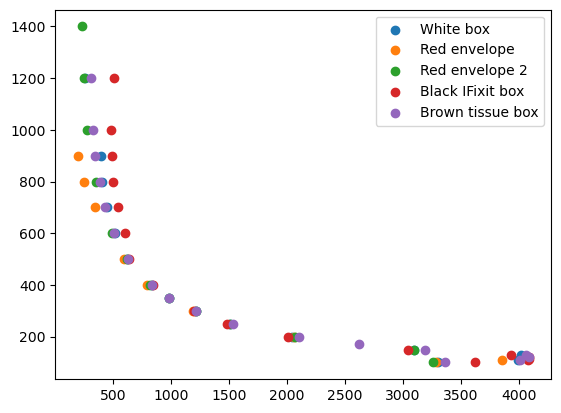

In [10]:
fig, ax = plt.subplots()
handles = []

for key, values in data.items():
    x_coords, y_coords = zip(*values)
    scatter = ax.scatter(x_coords, y_coords, label=key)
    handles.append(scatter)

ax.legend(handles=handles)
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset=False, useMathText=True))
plt.show()